"""
案例:
    演示学习率衰减策略.

学习率衰减策略介绍:
    目的:
        较之于AdaGrad, RMSProp, Adam方式, 我们可以通过 等间隔, 指定间隔, 指数等方式, 来手动控制学习率的调整.

    分类:
        等间隔学习率衰减
        指定间隔学习率衰减
        指数学习率衰减

等间隔学习率衰减:
    step_size: 间隔的轮数, 即: 多少轮调整一次学习率.
    gamma:     学习率衰减系数, 即: lr新 = lr旧 * gamma

指定间隔学习率衰减:
    milestones = [50, 125, 160]     里边定义的是要调整学习率的 轮数.
    gamma:     学习率衰减系数, 即: lr新 = lr旧 * gamma

指数间隔学习率衰减:
    前期学习率衰减快, 中期慢, 后期更慢, 更符合梯度下降规律.
    公式:
        lr新 = lr旧 * gamma ** epoch

总结:
    等间隔学习率衰减:
        优点:
            直观, 易于调试, 适用于 大批量数据.
        缺点:
            学习率变化较大, 可能跳过最优解.
        应用场景:
            大型数据集, 较为简单的任务.

    指定间学习率衰减:
        优点:
            易于调试, 稳定训练过程.
        缺点:
            在某些情况下可能衰减过快, 导致优化提前停滞.
        应用场景:
            对训练平稳性要求较高的任务.
   指数学习率衰减:
        优点:
            平滑, 且考虑历史更新, 收敛稳定性较强.
        缺点:
            超参调节较为复杂, 可能需要更多的资源.
        应用场景:
            高精度训练, 避免过快收敛.

"""

In [1]:

# 导包
import torch
from torch import optim
import matplotlib.pyplot as plt

# 1. 定义函数, 演示: 等间隔学习率衰减

lr_list: [[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025

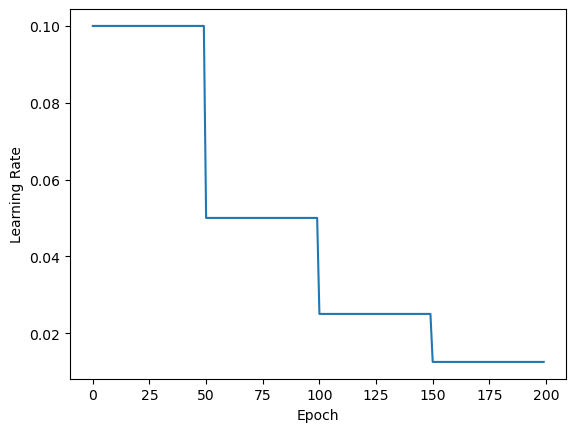

In [2]:
    # 1. 定义变量, 记录初始的 学习率, 训练的轮数, 每轮训练的批次数.
    lr, epochs, iteration = 0.1, 200, 10

    # 2. 创建数据集.  y_true, x, w
    # 真实值.
    y_true = torch.tensor([0])
    # 输入特征
    x = torch.tensor([1.0], dtype=torch.float32)
    # 权重参数w, 需要自动微分(求导)
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)

    # 3. 创建优化器对象, 动量法 -> 加速模型的收敛, 减少震荡.
    # 参1: 待优化的参数, 参2: 学习率, 参3: 动量系数
    optimizer = optim.SGD([w], lr=lr, momentum=0.9)

    # 4. 创建学习率衰减对象.
    # 思路1: 创建等间隔学习率衰减对象.
    # 参1: 优化器对象, 参2: 间隔的轮数(多少轮调整一次学习率), 参3: 学习率衰减系数.
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)   # [0.1, 0.1, 0.1... 0.05...]

    # 5. 创建两个列表, 分别表示: 训练轮数, 每轮训练用的学习率
    # epoch_list = [0, 1, 2, 3.... 50, 51, 52...100, 101, 101... 150, 151...199]
    # lr_list =    [0.1, 0.1, 0.1, 0.05........,0.025.........,  0.0125...]
    lr_list, epoch_list = [], []

    # 6. 循环遍历训练轮数, 进行具体的训练.
    for epoch in range(epochs):     # epoch: 0 ~ 199
        # 7. 获取当前轮数 和 学习率, 并保存到列表中.
        epoch_list.append(epoch)
        lr_list.append(scheduler.get_last_lr())     # 获取最后的lr(learning rate, 学习率)

        # 8. 循环遍历, 每轮每批次进行训练.
        for batch in range(iteration):
            # 9. 先计算预测值, 然后基于损失函数计算损失.
            y_pred = w * x
            # 10. 计算损失, 最小二乘法.
            loss = (y_pred - y_true) ** 2
            # 11. 梯度清零 + 反向传播 + 优化器更新参数.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 12. 更新学习率.
        scheduler.step()
    # 13. 打印结果:
    print(f'lr_list: {lr_list}')        # [0.1, 0.1, 0.1..., 0.05........,0.025.........,  0.0125...]

    # 14. 可视化.
    # x轴: 训练的轮数, y轴: 每轮训练用的学习率
    plt.plot(epoch_list, lr_list)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()


# 2. 定义函数, 演示: 指定间隔学习率衰减



lr_list: [[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.025], [0.025], [0.025], [0.025], [0.0

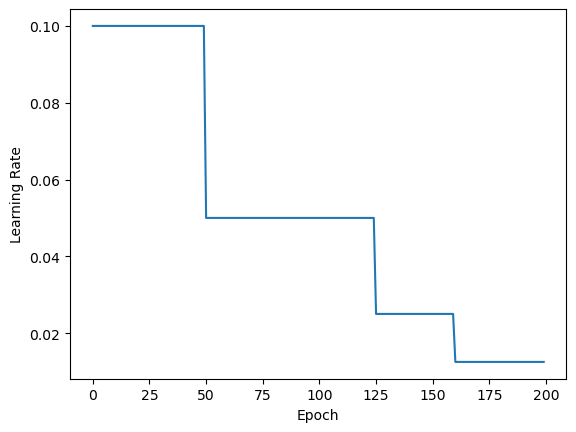

In [3]:
    # 1. 定义变量, 记录初始的 学习率, 训练的轮数, 每轮训练的批次数.
    lr, epochs, iteration = 0.1, 200, 10

    # 2. 创建数据集.  y_true, x, w
    # 真实值.
    y_true = torch.tensor([0])
    # 输入特征
    x = torch.tensor([1.0], dtype=torch.float32)
    # 权重参数w, 需要自动微分(求导)
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)

    # 3. 创建优化器对象, 动量法 -> 加速模型的收敛, 减少震荡.
    # 参1: 待优化的参数, 参2: 学习率, 参3: 动量系数
    optimizer = optim.SGD([w], lr=lr, momentum=0.9)

    # 4. 创建学习率衰减对象.
    # 思路1: 创建等间隔学习率衰减对象.
    # 参1: 优化器对象, 参2: 间隔的轮数(多少轮调整一次学习率), 参3: 学习率衰减系数.
    # scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)   # [0.1, 0.1, 0.1... 0.05...]

    # 思路2: 创建指定间隔学习率衰减对象.
    # 定义变量, 记录要修改学习率的轮数.
    milestones = [50, 125, 160]
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)

    # 5. 创建两个列表, 分别表示: 训练轮数, 每轮训练用的学习率
    # epoch_list = [0, 1, 2, 3.... 50, 51, 52...100, 101, 101... 150, 151...199]
    # lr_list =    [0.1, 0.1, 0.1, 0.05........,0.025.........,  0.0125...]
    lr_list, epoch_list = [], []

    # 6. 循环遍历训练轮数, 进行具体的训练.
    for epoch in range(epochs):     # epoch: 0 ~ 199
        # 7. 获取当前轮数 和 学习率, 并保存到列表中.
        epoch_list.append(epoch)
        lr_list.append(scheduler.get_last_lr())     # 获取最后的lr(learning rate, 学习率)

        # 8. 循环遍历, 每轮每批次进行训练.
        for batch in range(iteration):
            # 9. 先计算预测值, 然后基于损失函数计算损失.
            y_pred = w * x
            # 10. 计算损失, 最小二乘法.
            loss = (y_pred - y_true) ** 2
            # 11. 梯度清零 + 反向传播 + 优化器更新参数.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 12. 更新学习率.
        scheduler.step()
    # 13. 打印结果:
    print(f'lr_list: {lr_list}')        # [0.1, 0.1, 0.1..., 0.05........,0.025.........,  0.0125...]

    # 14. 可视化.
    # x轴: 训练的轮数, y轴: 每轮训练用的学习率
    plt.plot(epoch_list, lr_list)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()



# 3. 定义函数, 演示: 指数学习率衰减

lr_list: [[0.1], [0.095], [0.09025], [0.0857375], [0.08145062499999998], [0.07737809374999999], [0.07350918906249998], [0.06983372960937498], [0.06634204312890622], [0.0630249409724609], [0.05987369392383786], [0.05688000922764597], [0.05403600876626367], [0.05133420832795048], [0.04876749791155295], [0.046329123015975304], [0.04401266686517654], [0.04181203352191771], [0.039721431845821824], [0.037735360253530734], [0.035848592240854196], [0.03405616262881148], [0.03235335449737091], [0.030735686772502362], [0.029198902433877242], [0.027738957312183378], [0.026352009446574207], [0.025034408974245494], [0.023782688525533217], [0.022593554099256556], [0.021463876394293726], [0.020390682574579037], [0.019371148445850084], [0.01840259102355758], [0.0174824614723797], [0.016608338398760712], [0.015777921478822676], [0.014989025404881541], [0.014239574134637464], [0.01352759542790559], [0.012851215656510309], [0.012208654873684792], [0.011598222130000552], [0.011018311023500524], [0.0104673

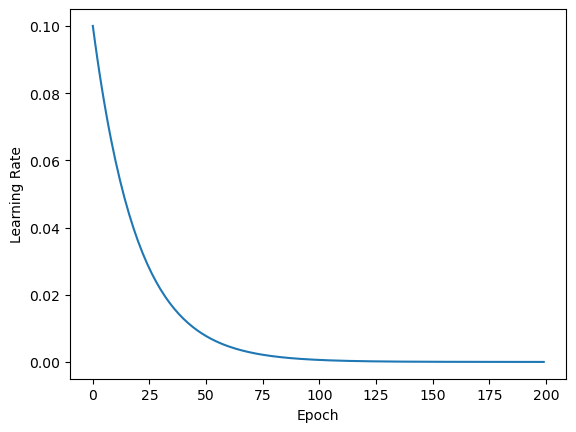

In [4]:
    # 1. 定义变量, 记录初始的 学习率, 训练的轮数, 每轮训练的批次数.
    lr, epochs, iteration = 0.1, 200, 10

    # 2. 创建数据集.  y_true, x, w
    # 真实值.
    y_true = torch.tensor([0])
    # 输入特征
    x = torch.tensor([1.0], dtype=torch.float32)
    # 权重参数w, 需要自动微分(求导)
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)

    # 3. 创建优化器对象, 动量法 -> 加速模型的收敛, 减少震荡.
    # 参1: 待优化的参数, 参2: 学习率, 参3: 动量系数
    optimizer = optim.SGD([w], lr=lr, momentum=0.9)

    # 4. 创建学习率衰减对象.
    # 思路1: 创建等间隔学习率衰减对象.
    # 参1: 优化器对象, 参2: 间隔的轮数(多少轮调整一次学习率), 参3: 学习率衰减系数.
    # scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)   # [0.1, 0.1, 0.1... 0.05...]

    # 思路2: 创建指定间隔学习率衰减对象.
    # 定义变量, 记录要修改学习率的轮数.
    # milestones = [50, 125, 160]
    # scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)

    # 思路3: 创建指数学习率衰减对象.
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

    # 5. 创建两个列表, 分别表示: 训练轮数, 每轮训练用的学习率
    # epoch_list = [0, 1, 2, 3.... 50, 51, 52...100, 101, 101... 150, 151...199]
    # lr_list =    [0.1, 0.1, 0.1, 0.05........,0.025.........,  0.0125...]
    lr_list, epoch_list = [], []

    # 6. 循环遍历训练轮数, 进行具体的训练.
    for epoch in range(epochs):     # epoch: 0 ~ 199
        # 7. 获取当前轮数 和 学习率, 并保存到列表中.
        epoch_list.append(epoch)
        lr_list.append(scheduler.get_last_lr())     # 获取最后的lr(learning rate, 学习率)

        # 8. 循环遍历, 每轮每批次进行训练.
        for batch in range(iteration):
            # 9. 先计算预测值, 然后基于损失函数计算损失.
            y_pred = w * x
            # 10. 计算损失, 最小二乘法.
            loss = (y_pred - y_true) ** 2
            # 11. 梯度清零 + 反向传播 + 优化器更新参数.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 12. 更新学习率.
        scheduler.step()
    # 13. 打印结果:
    print(f'lr_list: {lr_list}')        # [0.1, 0.1, 0.1..., 0.05........,0.025.........,  0.0125...]

    # 14. 可视化.
    # x轴: 训练的轮数, y轴: 每轮训练用的学习率
    plt.plot(epoch_list, lr_list)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()

